# In this section different type of noises are applied on original image and trying to replicate same as noisy noise. In order to find out what type of noises are present on Noisy image and estimate noise parameters.

In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

def add_gaussian_noise(image, mean, std_dev):
    """
    Adds Gaussian noise to the input image.

    Args:
        image: The input image.
        mean: Mean of the Gaussian distribution
        std_dev: Standard deviation

    Returns:
        Noisy image.
    """
    noise = np.random.normal(mean, std_dev, size=image.shape)
    noise = noise.astype(np.uint8)
    noisy_image = image + noise
    return noisy_image

def sp_noise(image, prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = image.copy()
    if len(image.shape) == 2:
        black = 0
        white = 255            
    else:
        colorspace = image.shape[2]
        if colorspace == 3:  # RGB
            black = np.array([0, 0, 0], dtype='uint8')
            white = np.array([255, 255, 255], dtype='uint8')
        else:  # RGBA
            black = np.array([0, 0, 0, 255], dtype='uint8')
            white = np.array([255, 255, 255, 255], dtype='uint8')
    probs = np.random.random(output.shape[:2])
    output[probs < (prob / 2)] = black
    output[probs > 1 - (prob / 2)] = white
    return output

def add_uniform_noise(image, low, high):
    noisy_image = np.copy(image)
    h, w = image.shape[:2]

    # Generate random noise
    noise = np.random.uniform(low, high, size=(h, w))

    # Add noise to the image
    noisy_image = np.clip(noisy_image + noise, 0, 255).astype(np.uint8)

    return noisy_image

def analyze_histogram(image, region, show=True, message = "Histogram of Gray Levels"):
    # Extract the region of interest from the image
    roi = image[region[0]:region[1], region[2]:region[3]]

    # Calculate the histogram of the region
    histogram = cv2.calcHist([roi], [0], None, [256], [0, 256])

    # Plot the histogram
    if show:
        plt.figure()
        plt.title(message)
        plt.xlabel('Gray Level')
        plt.ylabel('Frequency')
        plt.plot(histogram)
        plt.xlim([0, 255])
        plt.show()
    else:
        return histogram
    
    
def show_plots(original, noisy, histogram, message):
    plt.figure(figsize=(20, 20))  # Set the width to 10 inches and height to 6 inches
    plt.subplot(1, 3, 1)
    plt.imshow(original,  cmap='gray')
    plt.title('Original image')

    plt.subplot(1, 3, 2)
    plt.imshow(noisy,  cmap='gray')
    plt.title(message)

    plt.subplot(1, 3, 3)

    plt.title(message)
    plt.xlabel('Gray Level')
    plt.ylabel('Frequency')
    plt.plot(histogram)
    plt.xlim([0, 255])
    ax = plt.gca()
    ax.set_aspect(2)
    plt.show()
    
img_folder = "Dataset_per_group/Dataset_per_group/gr6/Original/"
files = os.listdir(img_folder)
print(files)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Dataset_per_group/Dataset_per_group/gr6/Original/'

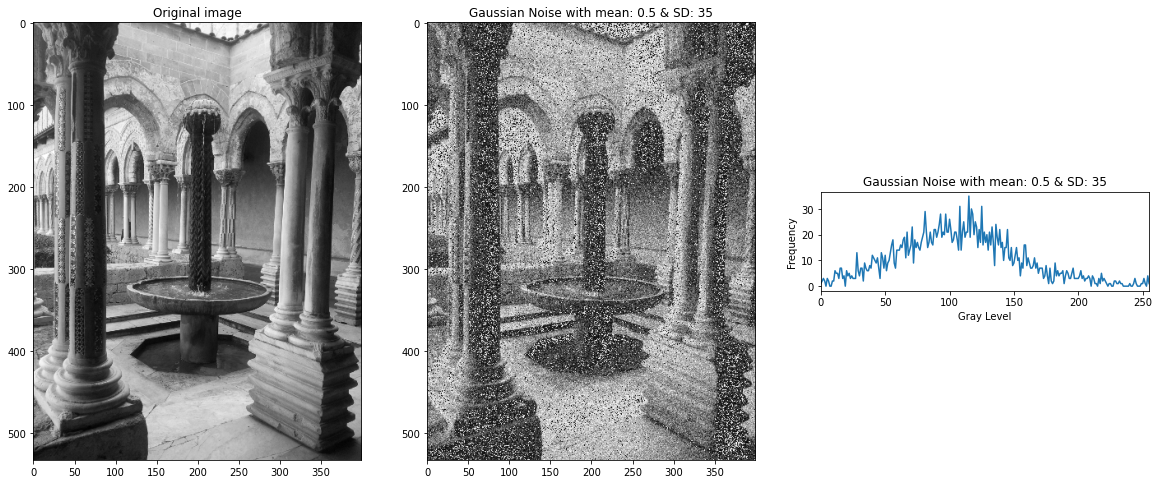

In [262]:
gaussian_noise_35 = add_gaussian_noise(cv2.imread(img_folder+files[0], 0), 0.5, 35)
cv2.imwrite("gaussian_noise_35.jpg", gaussian_noise_35)
histogram_35 = analyze_histogram(gaussian_noise_35, [0, 50, 0, 50], show=False)
parameter = "Gaussian Noise with mean: 0.5 & SD: 35"
show_plots(cv2.imread(img_folder+files[0], 0), gaussian_noise_35, histogram_35, parameter)

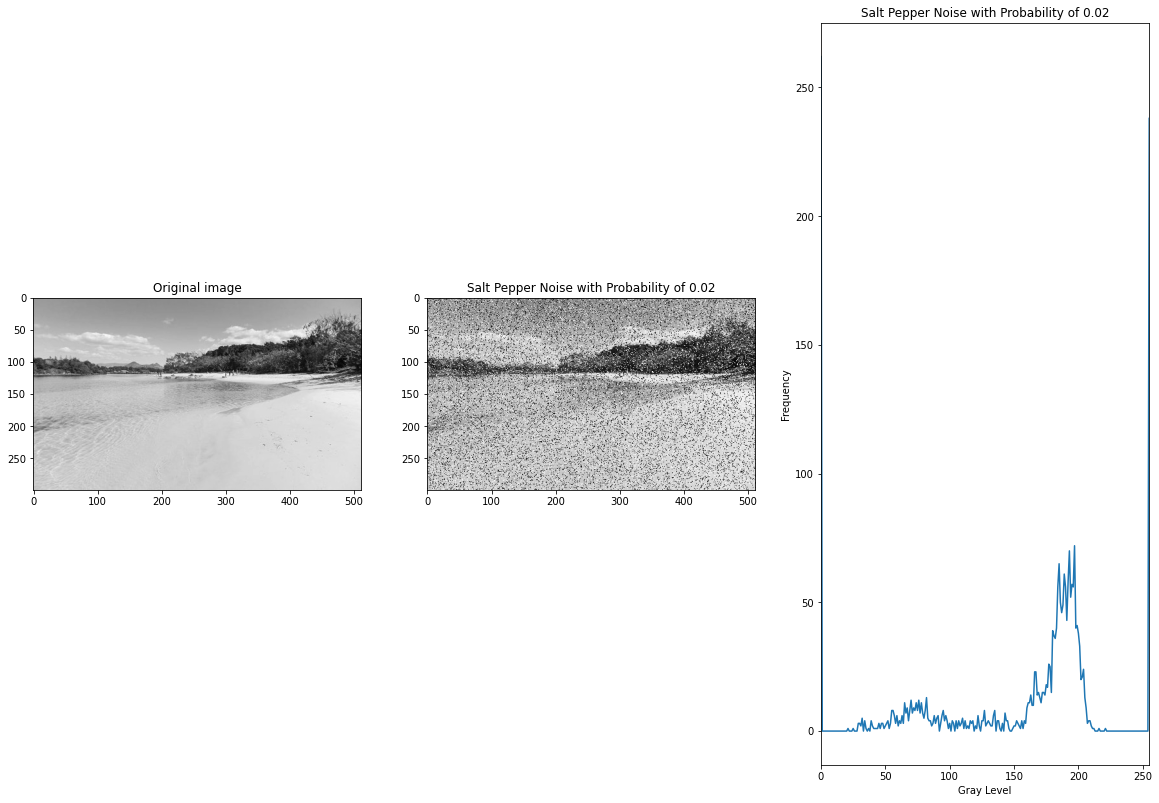

In [263]:
salt_pepper_noise_90= sp_noise(cv2.imread(img_folder+files[1], 0), 0.2)
parameter = "Salt Pepper Noise with Probability of 0.02"
histogram_90 = analyze_histogram(salt_pepper_noise_90, [100, 150, 100, 150], show=False)
show_plots(cv2.imread(img_folder+files[1], 0), salt_pepper_noise_90, histogram_90, parameter)

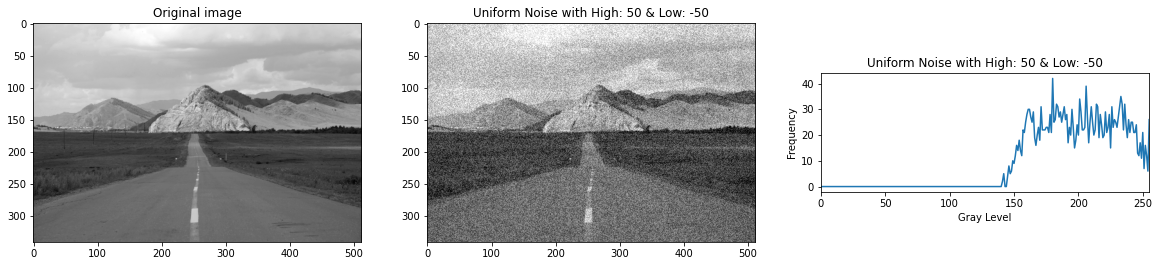

In [280]:
uniform_noise_9 = add_uniform_noise(cv2.imread(img_folder+files[2], 0), 50, -50)
cv2.imwrite("uniform_noise_9.jpg", uniform_noise_9)
histogram_9 = analyze_histogram(uniform_noise_9, [0, 50, 0, 50], show=False)
parameter = "Uniform Noise with High: 50 & Low: -50"
show_plots(cv2.imread(img_folder+files[2], 0), uniform_noise_9, histogram_9, parameter)

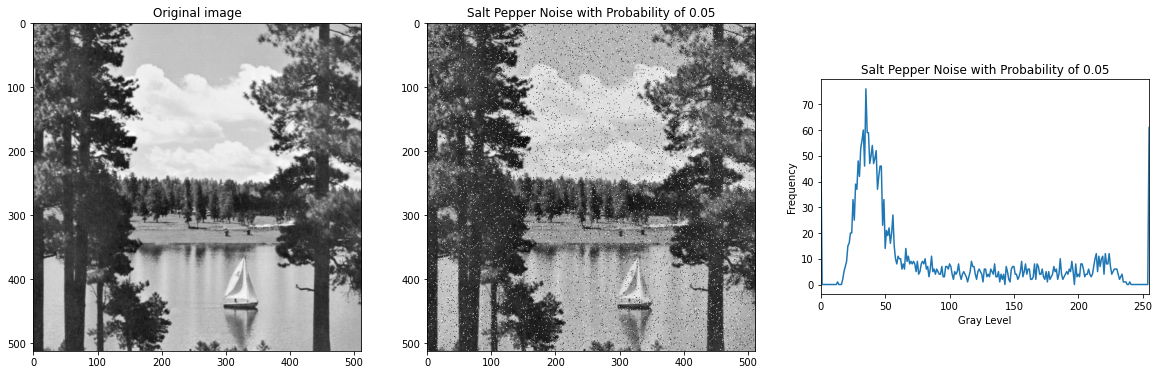

In [265]:
salt_pepper_noise_68 = sp_noise(cv2.imread(img_folder+files[3], 0), 0.05)
parameter = "Salt Pepper Noise with Probability of 0.05"
histogram_68 = analyze_histogram(salt_pepper_noise_68, [100, 150, 100, 150], show=False)
show_plots(cv2.imread(img_folder+files[3], 0), salt_pepper_noise_68, histogram_68, parameter)

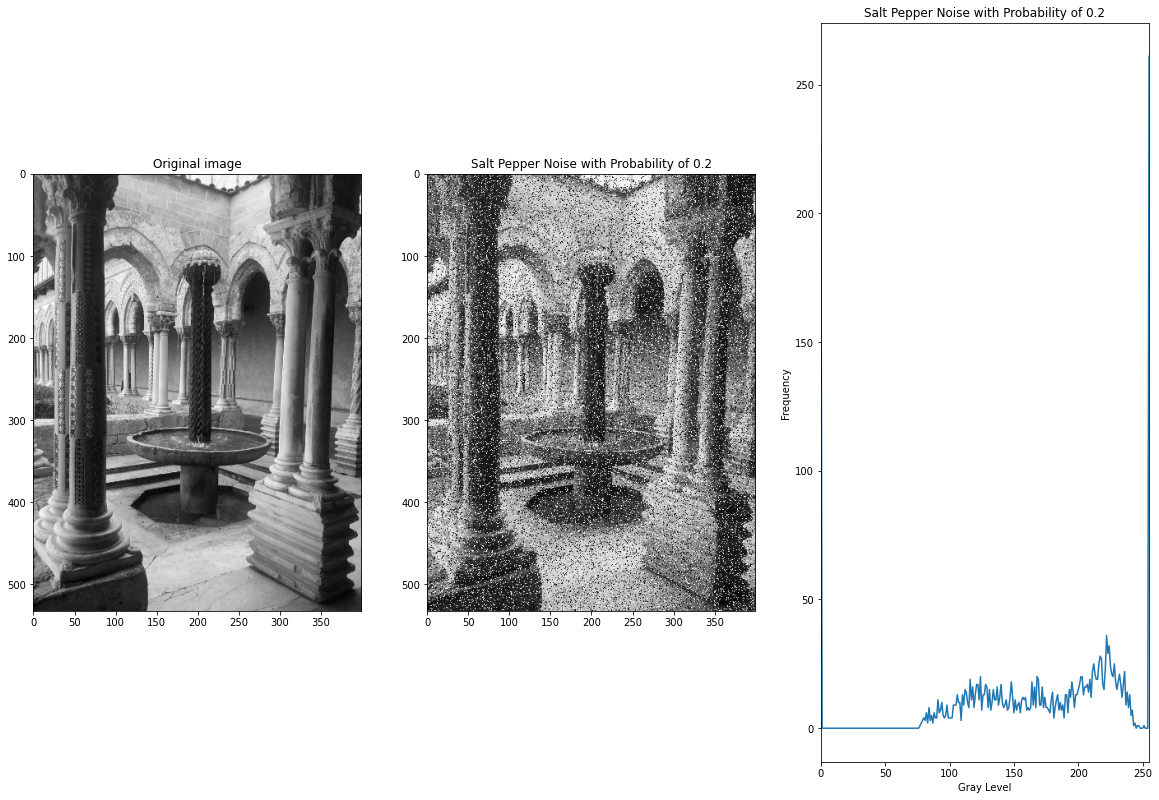

In [282]:
salt_pepper_noise_80= sp_noise(cv2.imread(img_folder+files[4], 0), 0.2)
parameter = "Salt Pepper Noise with Probability of 0.2"
histogram_80 = analyze_histogram(salt_pepper_noise_80, [100, 150, 100, 150], show=False)
show_plots(cv2.imread(img_folder+files[4], 0), salt_pepper_noise_80, histogram_80, parameter)

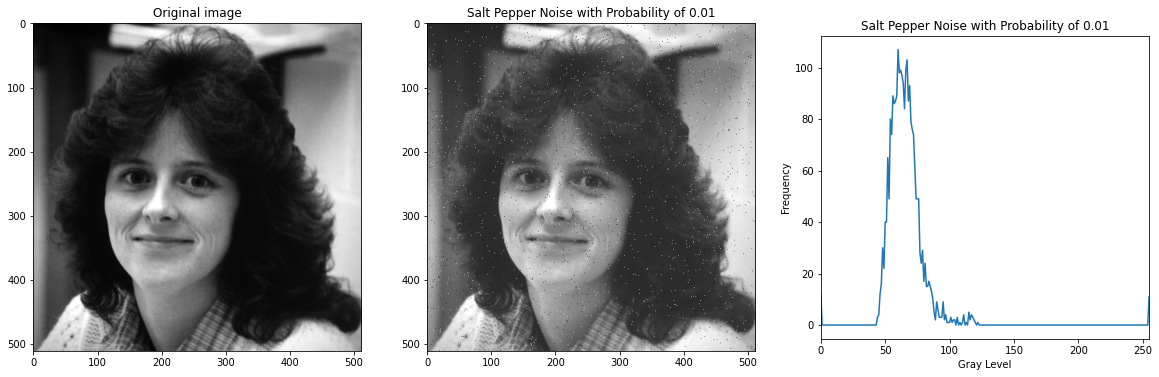

In [283]:
img_52 = cv2.imread(img_folder+files[5], 0)
salt_pepper_noise_52 = sp_noise(img_52.copy(), 0.01)
cv2.imwrite("salt_pepper_noise_52.jpg", salt_pepper_noise_52)
histogram_52 = analyze_histogram(salt_pepper_noise_52, [100, 150, 100, 150], show=False)

parameter = "Salt Pepper Noise with Probability of 0.01"
show_plots(img_52, salt_pepper_noise_52, histogram_52, parameter)

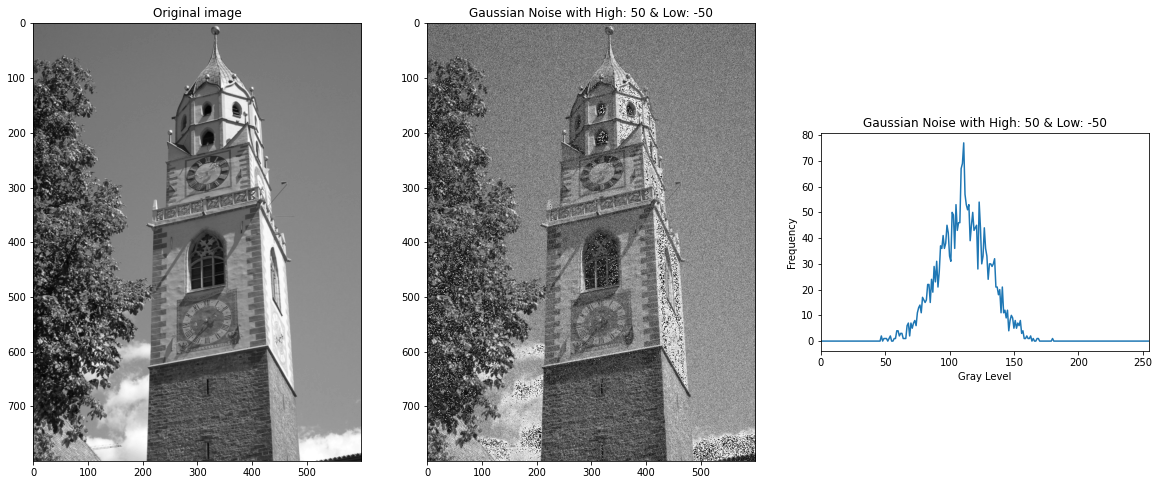

In [338]:
gaussian_noise_28 = add_gaussian_noise(cv2.imread(img_folder+files[6], 0), 0.05,20)
cv2.imwrite("gaussian_noise_28-.jpg", gaussian_noise_28)
histogram_28 = analyze_histogram(gaussian_noise_28, [0, 50, 0, 50], show=False)
parameter = "Gaussian Noise with High: 50 & Low: -50"
show_plots(cv2.imread(img_folder+files[6], 0), gaussian_noise_28, histogram_28, parameter)

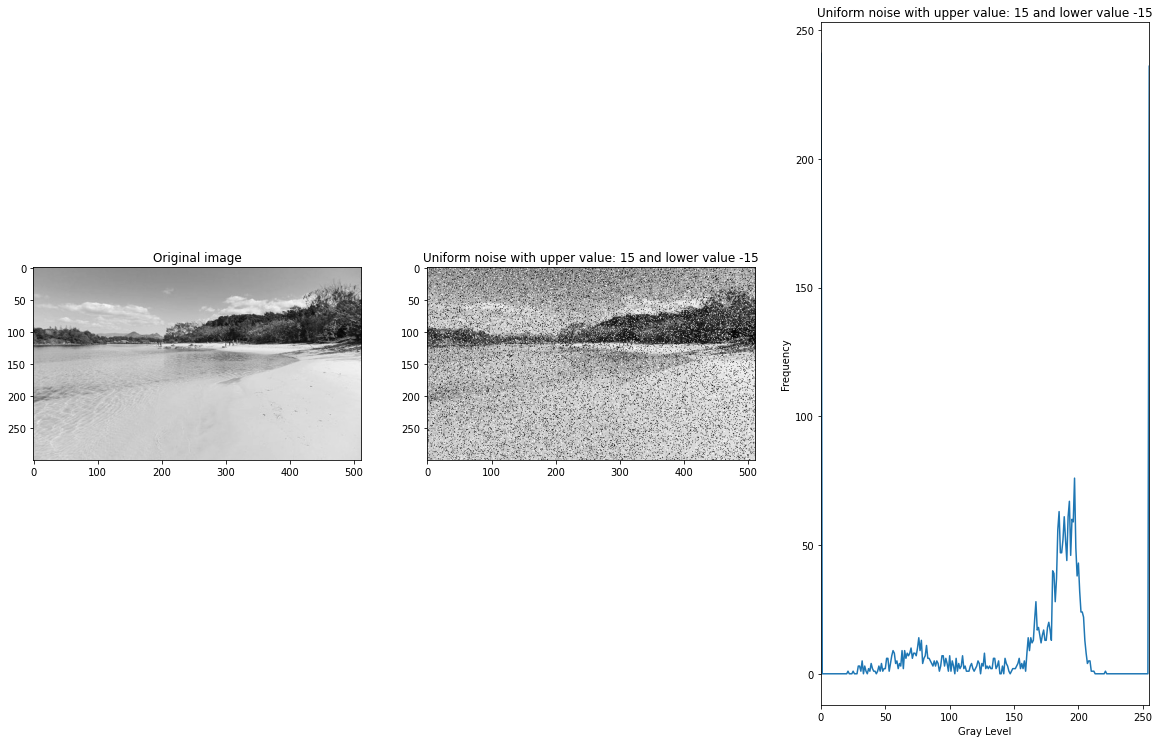

In [174]:
uniform_100 = add_uniform_noise(cv2.imread(img_folder+files[7], 0), 15, -15)
parameter = "Uniform noise with upper value: 15 and lower value -15"
histogram_90 = analyze_histogram(salt_pepper_noise_90, [100, 150, 100, 150], show=False)
show_plots(cv2.imread(img_folder+files[1], 0), salt_pepper_noise_90, histogram_90, parameter)

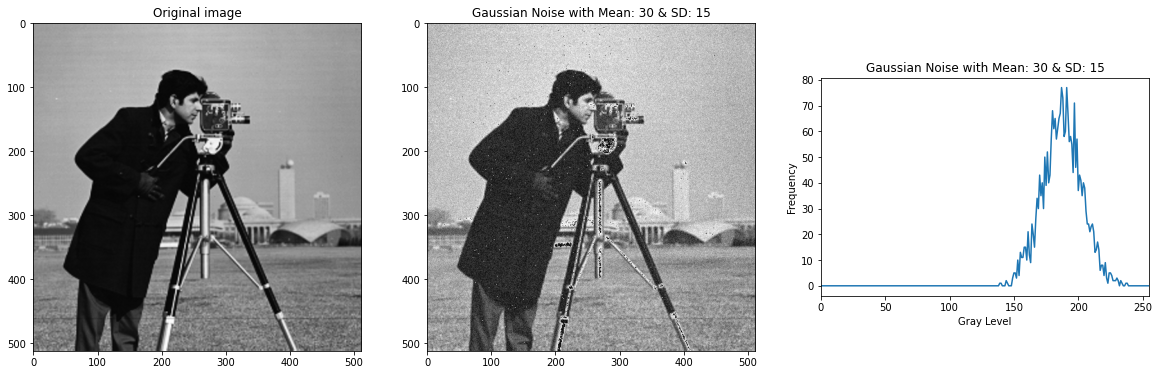

In [74]:
gaussian_noise_96 = add_gaussian_noise(cv2.imread(img_folder+files[8], 0), 30, 15)
cv2.imwrite("gaussian_noise_96.jpg", gaussian_noise_96)
histogram_96 = analyze_histogram(gaussian_noise_96, [0, 50, 0, 50], show=False)
parameter = "Gaussian Noise with Mean: 30 & SD: 15"
show_plots(cv2.imread(img_folder+files[8], 0), gaussian_noise_96, histogram_96, parameter)

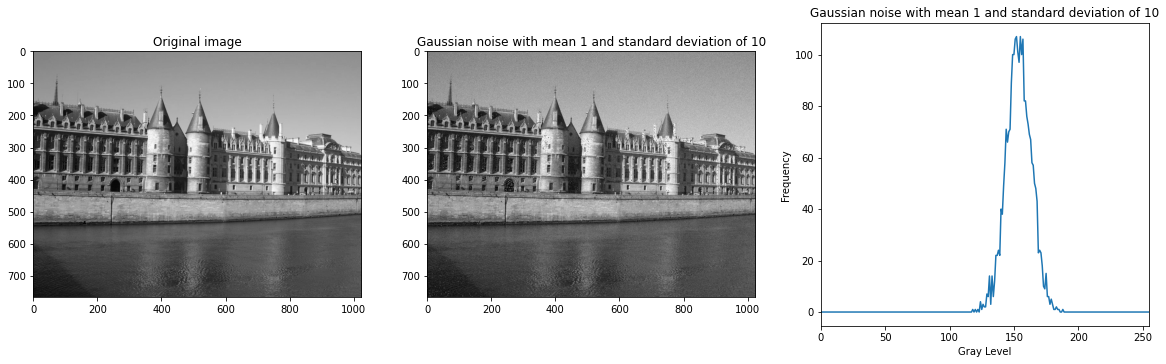

In [177]:
gaussian_16 = add_gaussian_noise(cv2.imread(img_folder+files[-1], 0), 1, 10)
parameter = "Gaussian noise with mean 1 and standard deviation of 10"
histogram_16 = analyze_histogram(gaussian_16, [100, 150, 100, 150], show=False)
show_plots(cv2.imread(img_folder+files[-1], 0), gaussian_16, histogram_16, parameter)